<a href="https://colab.research.google.com/github/PalakurthiMeghana/ApexPlanet-Tasks/blob/main/FRAUD_DETECTION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('test_Dataset1.csv')

In [55]:
df.dropna(inplace=True)

In [56]:
df['age'] = df['age'].astype(str).str.replace("'", "")
df = df[df['age'] != 'U']
df['age'] = df['age'].astype(int)

In [57]:
features = ['step', 'age', 'amount']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [58]:
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [59]:
predictions_raw = model.predict(X_scaled)
y_pred = (predictions_raw == -1).astype(int)
y_true = df['fraud'].values

In [60]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Precision: 0.20
Recall: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     58637
           1       0.20      0.82      0.32       707

    accuracy                           0.96     59344
   macro avg       0.60      0.89      0.65     59344
weighted avg       0.99      0.96      0.97     59344



In [61]:
anomaly_scores = -model.decision_function(X_scaled)
auc_score = roc_auc_score(y_true, anomaly_scores)
fpr, tpr, _ = roc_curve(y_true, anomaly_scores)

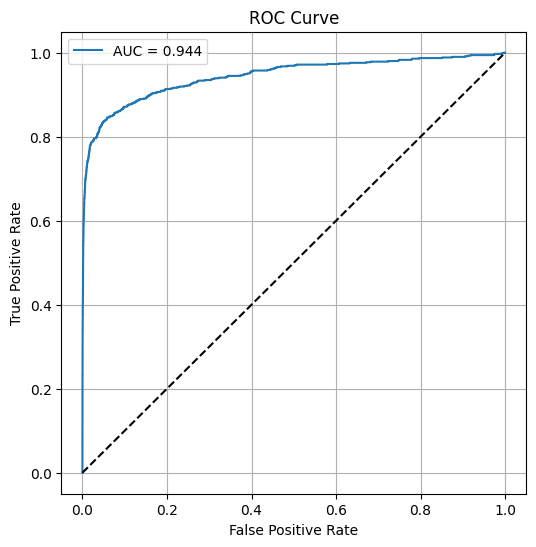

In [62]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()